<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>Multiple regression with the problem of correlated predictors</h1>
### Wei-Ming Tsai, MPO624, Spring 2018
### Date: 02/02/18

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

## Relationships between Rainfall, Precipitable water and SST
### convective rainfall (the daily total, in cm) depends on many factors or _ingredients_. 

### Dataset: 
- Type: 2017 July monthly mean over the euqator, 2.5&deg; x 2.5&deg;
- GPCP: Precipitaion [mm/day]
- OISST: Sea surface temperature [K]
- NCEP Reanalysis: Precipitable water [mm]

#### So let's build nature's secret process as a sum of 3 factors: SST, PW, and 'other'. 

In [142]:
# Building Nature's secret reality. Don't look, this is mysterious. (OK, yeah, I am using random numbers)
%matplotlib inline
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from scipy import interpolate
from mpl_toolkits.mplot3d import Axes3D

# import data
os.chdir('/Users/willytsai/MPO624_data/data')
print os.getcwd()
 
nc_fid=Dataset('gpcp.mnmean_2017Jul.nc','r','format','NETCDF4');
# Extract data from NetCDF file
lat = nc_fid.variables['Latitude'][:]  # extract/copy the data
lon = nc_fid.variables['Longitude'][:]
time = nc_fid.variables['time'][:]
precip = nc_fid.variables['precip'][:]  # GPCP preciptiation 2.5 degree    

nc_fid=Dataset('pw.daily_2017Jul.nc','r','format','NETCDF4');
# Extract data from NetCDF file
lat_pw = nc_fid.variables['Latitude'][:]  # extract/copy the data
lon_pw = nc_fid.variables['Longitude'][:]
time_pw = nc_fid.variables['time'][:]
pw = nc_fid.variables['pr_wtr'][:]  # NCEP precipitable water 2.5 degree

nc_fid=Dataset('sst.mnmean_2017Jul.regrid.nc','r','format','NETCDF4');
# Extract data from NetCDF file
lat_sst = nc_fid.variables['lat'][:]  # extract/copy the data
lon_sst = nc_fid.variables['lon'][:]
time_sst = nc_fid.variables['time'][:]
sst = nc_fid.variables['sst'][:]  # OISST 1/4 degree

/Users/willytsai/MPO624_data/data


In [143]:
sel_lat=0; 
for i in range(len(lat)):
    if lat[i]==1.25:
        k=i; # find the index
precip_eq=np.squeeze(precip[:,k,:])[0:-1];
        
for i in range(len(lat_pw)):
    if lat_pw[i]==sel_lat:
        k=i; # find the index
pw_eq=np.squeeze(np.mean(pw[:,k,:],0))[0:-1];
        
for i in range(len(lat_sst)):
    if lat_sst[i]==sel_lat:
        k=i; # find the index
sst_eq=np.squeeze(sst[:,k,:]);
         

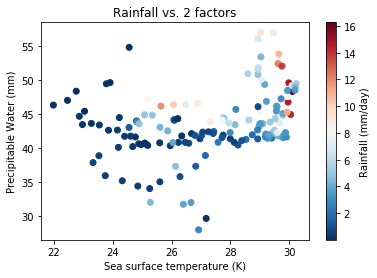

In [144]:
# Let's make some weather: 365 days. Remember, LR and PW are correlated!
N=len(precip_eq);

# The factors that govern rainfall R. Don't look! Nature is secretly a random number generator!
#LR = np.random.randn(N); ntosig = 0.8 ; PW = LR + np.random.randn(N)*ntosig; other = np.random.randn(N)
#R = 1.0*LR + 2.0*PW + other

fig,ax=plt.subplots(1,1)
cs = ax.scatter(sst_eq, pw_eq, c=precip_eq, cmap=plt.cm.RdBu_r); #plt.xlim(-5, 5); plt.ylim(-5, 5)

ax.set_xlabel('Sea surface temperature (K)')
ax.set_ylabel('Precipitable Water (mm)')
ax.set_title('Rainfall vs. 2 factors')
cbar = fig.colorbar(cs)
cbar.set_label('Rainfall (mm/day)')

## Let's explore our dataset: SST, PW, and $R_{meas}$

Text(0,0.5,u'Precipitable Water (mm)')

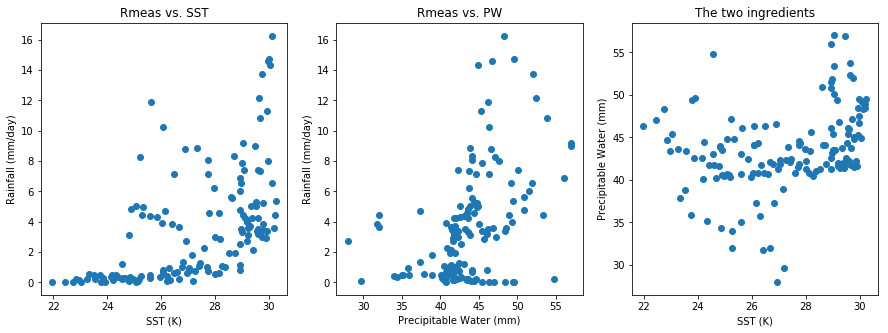

In [145]:
fig2, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
ax1.scatter(sst_eq, precip_eq) 
ax1.set_title('Rmeas vs. SST')
ax1.set_xlabel('SST (K)')
ax1.set_ylabel('Rainfall (mm/day)')

ax2.scatter(pw_eq, precip_eq) 
ax2.set_title('Rmeas vs. PW')
ax2.set_xlabel('Precipitable Water (mm)')
ax2.set_ylabel('Rainfall (mm/day)')

ax3.scatter(sst_eq, pw_eq) 
ax3.set_title('The two ingredients')
ax3.set_xlabel('SST (K)')
ax3.set_ylabel('Precipitable Water (mm)')

### The SST vs Rainfall regression

In [146]:
a = np.corrcoef(sst_eq,precip_eq)[1,0] *np.std(precip_eq)/np.std(sst_eq)
print('a = ',a, 'mm/day per (K)')

('a = ', 0.91761296453173524, 'mm per (K/day)')


## EXERCISE 1: overlay the line aLR on the Rmeas-LR scatter plot

### The PW vs Rainfall regression

In [147]:
b = np.corrcoef(pw_eq,precip_eq)[1,0] *np.std(precip_eq)/np.std(pw_eq)
print('b = ',b, 'mm/day per (mm)')

('b = ', 0.35054912704212021, 'mm per (mm/day)')


## EXERCISE 2: overlay the line aLR on the Rmeas-LR scatter plot

### The generalizer's regression - Multiple regression

In [148]:
from sklearn import linear_model
reg = linear_model.LinearRegression()

# FOr 2D interpolation, pack up the data in right shaped container:
indata = np.zeros( (N,2) )
indata[:,0] = sst_eq
indata[:,1] = pw_eq

# Fit and display
reg.fit(indata,precip_eq) # training by observed data
print('c, d = ', reg.coef_, 'mm/day per K, and mm/day per mm')

('c, d = ', array([ 0.74672768,  0.24447743]), 'mm/day per K, and mm/day per mm')


## EXERCISE 3: Express the above results graphically
### find the least-square fitted surface for Precipitation as a function of PW and SST 

(0, 20)

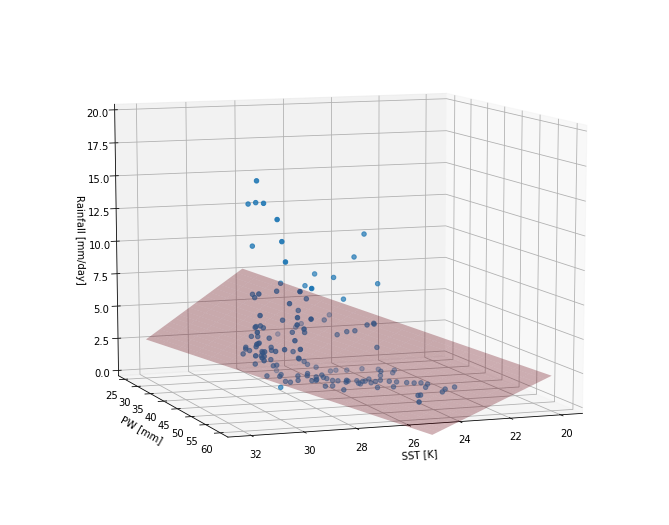

In [149]:
fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = Axes3D(fig, elev=10, azim=70)

x=np.linspace(20,32,num=20); # sst
y=np.linspace(25,60,num=20); # pw
xv,yv=np.meshgrid(x,y);
testdata=np.zeros((400,2));
testdata[:,0]=np.ravel(xv);testdata[:,1]=np.ravel(yv);
h=reg.predict(testdata)
ax.plot_surface(xv,yv,np.reshape(h,(20,20)),cmap=plt.cm.get_cmap('Reds',1),alpha=0.3);

ax.scatter(sst_eq, pw_eq,precip_eq) 
ax.set_xlabel('SST [K]');
ax.set_ylabel('PW [mm]');
ax.set_zlabel('Rainfall [mm/day]')
ax.set_zlim(0,20)

## EXERCISE 4: Find the residuals, the _unexplained variance_ 
#### that is, $(R_{meas} - model)^2$
### for all 3 postulated models. 

## _Can you say that one model is better than another?_

## EXERCISE 5: Explain what is wrong with postulating  
### $R_{meas} = a \times LR + b \times PW$

## To do this, scatter plot its residual against $R_{meas}$. 
### _What principle about postulated models is violated?_
